In [6]:
import pandas as pd
import numpy as np
import spacy

import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt

from urllib.request import urlopen

# Q1

## Chess Transfers

For this question we are going to use the following dataset:

In [2]:
chess = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')
chess

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
3,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
4,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
...,...,...,...,...,...
927,https://ratings.fide.com/fedchange.phtml?year=...,1628313,GER,AUT,1/9/17
928,https://ratings.fide.com/fedchange.phtml?year=...,5200393,SGP,PHI,1/11/17
929,https://ratings.fide.com/fedchange.phtml?year=...,2002515,POL,USA,1/9/17
930,https://ratings.fide.com/fedchange.phtml?year=...,407747,SCO,ENG,1/12/17


The data shows chess grand masters moving one chess federation to another chess federation.

1. Calculate the number of chess masters moved to each federation. You must obtain a pandas data frame with two columns: Federation name and the number of grand masters moved into that specific federation.
2. Sort the table (highest to the lowest.)
3. DIsplay the top 10 federations as a bar chart.
4. Construct a python dictionary where the keys are pairs of federations (A,B) and the values are number of times grand masters moved from federation A to federation B.
5. Filter the dictionary and retain only the pairs that appear 5 or more times.
6. Constuct a **directed** `networkx` graph from the keys of the dictionary you constructed in step 5.
7. Display the graph.

The decoder version I was using did not support my directed graph drawing. So I had to downgrade my version to 4.3.

In [ ]:
pip install decorator==4.3

# Answer #1

## Libraries

We import the requisite libraries:

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

## Web Scraping

We read the link containing the data with pandas ```pd.read_csv()``` function.

In [2]:
chess = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')
chess

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
3,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
4,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
...,...,...,...,...,...
927,https://ratings.fide.com/fedchange.phtml?year=...,1628313,GER,AUT,1/9/17
928,https://ratings.fide.com/fedchange.phtml?year=...,5200393,SGP,PHI,1/11/17
929,https://ratings.fide.com/fedchange.phtml?year=...,2002515,POL,USA,1/9/17
930,https://ratings.fide.com/fedchange.phtml?year=...,407747,SCO,ENG,1/12/17


## 1) Data Processing

With ```Counter()```, we create a dataframe containing the Federation name and the number of grandmasters that have moved to that federation.

In [3]:
res=Counter(chess['Federation'])
df=pd.DataFrame(list(res.items()), columns=['Federation','Transported'])
df

,Federation,Transported
0,USA,89
1,BIH,32
2,ESA,2
3,AUT,29
4,AUS,23
...,...,...
100,GUY,1
101,KOS,1
102,MAD,1
103,BLR,2


## 2) 

We sort the numeric column in our table from largest to smallest with the ```sort_values()``` function.

In [4]:
sorted_df=df.sort_values(by=['Transported'],ascending=False)
sorted_df=sorted_df.reset_index(drop=True)
sorted_df

,Federation,Transported
0,USA,89
1,GER,55
2,CAN,44
3,ESP,41
4,RUS,36
...,...,...
100,PUR,1
101,ARG,1
102,QAT,1
103,CYP,1


## 3) 

We choose the top 10.

In [5]:
top_10=sorted_df.loc[0:9,:]
top_10

,Federation,Transported
0,USA,89
1,GER,55
2,CAN,44
3,ESP,41
4,RUS,36
5,FRA,34
6,BIH,32
7,CRO,32
8,TUR,31
9,AUT,29


And we visualize it with ```plt.bar()```.

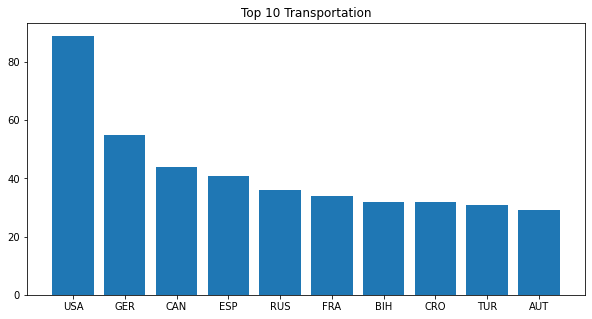

In [6]:
plt.figure(figsize=(10,5))
plt.bar(top_10['Federation'],top_10['Transported']);
plt.title("Top 10 Transportation");

## 4)

For question 4, we first calculate the repeating rows using ```groupby()```.

In [7]:
S_D=['Form.Fed', 'Federation']
df_2=chess.groupby(S_D,as_index=False).size()
df_2

,Form.Fed,Federation,size
0,AHO,ARU,1
1,ALB,BEL,1
2,ALB,BIH,1
3,ALB,FRA,1
4,AND,ESP,4
...,...,...,...
437,YUG,BIH,2
438,YUG,CAN,4
439,YUG,ESP,2
440,YUG,SVK,2


To create a python dictionary where keys are federation pairs (A,B) and values are the number of grandmasters moved from federation A to federation B, we make the dictionary desired with a for loop.

In [8]:
A = df_2['Form.Fed']
B = df_2['Federation']
size = df_2['size']
i=0
X = {}
for i in range(len(A)):
    X[(A[i],B[i])]=size[i]
X

{('AHO', 'ARU'): 1,
 ('ALB', 'BEL'): 1,
 ('ALB', 'BIH'): 1,
 ('ALB', 'FRA'): 1,
 ('AND', 'ESP'): 4,
 ('ARG', 'CAN'): 1,
 ('ARG', 'ESP'): 5,
 ('ARG', 'ITA'): 2,
 ('ARG', 'LUX'): 1,
 ('ARG', 'RUS'): 1,
 ('ARG', 'URU'): 1,
 ('ARM', 'BEL'): 1,
 ('ARM', 'CAN'): 2,
 ('ARM', 'ENG'): 1,
 ('ARM', 'RUS'): 2,
 ('ARM', 'UKR'): 1,
 ('ARM', 'USA'): 8,
 ('AUS', 'BLR'): 2,
 ('AUS', 'HKG'): 1,
 ('AUS', 'JPN'): 1,
 ('AUS', 'SUI'): 2,
 ('AUS', 'TPE'): 1,
 ('AUT', 'GER'): 3,
 ('AUT', 'LIE'): 1,
 ('AUT', 'SUI'): 2,
 ('AZE', 'BEL'): 1,
 ('AZE', 'RUS'): 2,
 ('AZE', 'TUR'): 8,
 ('AZE', 'USA'): 3,
 ('BAN', 'CZE'): 1,
 ('BAN', 'FRA'): 1,
 ('BAR', 'GUY'): 1,
 ('BEL', 'AZE'): 1,
 ('BEL', 'FRA'): 1,
 ('BEL', 'TUR'): 3,
 ('BEL', 'YUG'): 2,
 ('BIH', 'CRO'): 8,
 ('BIH', 'GER'): 4,
 ('BIH', 'MNE'): 1,
 ('BIH', 'NED'): 1,
 ('BIH', 'SRB'): 3,
 ('BIH', 'SUI'): 1,
 ('BIH', 'TUR'): 2,
 ('BIH', 'USA'): 1,
 ('BLR', 'AUS'): 2,
 ('BLR', 'CAN'): 1,
 ('BLR', 'FRA'): 2,
 ('BLR', 'ISR'): 1,
 ('BLR', 'POL'): 1,
 ('BLR', 'SWE'): 2,


## 5)

We filter the dictionary using the ```filter()``` function. We consider the ones larger than 4.

In [9]:
new_dict=dict(filter(lambda elem: elem[1] >= 5, X.items() ))
new_dict

{('ARG', 'ESP'): 5,
 ('ARM', 'USA'): 8,
 ('AZE', 'TUR'): 8,
 ('BIH', 'CRO'): 8,
 ('CHN', 'SIN'): 5,
 ('CRO', 'BIH'): 8,
 ('CUB', 'ESP'): 7,
 ('CUB', 'USA'): 7,
 ('ENG', 'WLS'): 7,
 ('ESP', 'AND'): 7,
 ('FRA', 'MNC'): 17,
 ('GER', 'LIE'): 5,
 ('GER', 'SUI'): 9,
 ('HUN', 'AUT'): 5,
 ('IND', 'USA'): 11,
 ('ISR', 'CAN'): 7,
 ('PHI', 'USA'): 6,
 ('ROU', 'FRA'): 8,
 ('RUS', 'CZE'): 8,
 ('RUS', 'GER'): 16,
 ('RUS', 'ISR'): 5,
 ('RUS', 'UKR'): 10,
 ('RUS', 'USA'): 7,
 ('SCG', 'CRO'): 10,
 ('SRB', 'BIH'): 18,
 ('SRB', 'CRO'): 6,
 ('SVK', 'CZE'): 8,
 ('SYR', 'FIN'): 6,
 ('UKR', 'GER'): 12,
 ('UKR', 'RUS'): 14,
 ('UKR', 'USA'): 7,
 ('USA', 'CAN'): 5}

## 6) & 7) 

We draw the directed graph of the dictionary using the ```networkx``` library.
With ```np.concenate()```, we introduce all our nodes separately to our graph.
When we put the binaries in the dictionary's keys in the edges section, our graph is ready.
We draw with ```nx.draw()```. Thanks to ```with_labels = True```, the names of the nodes are also written on them.

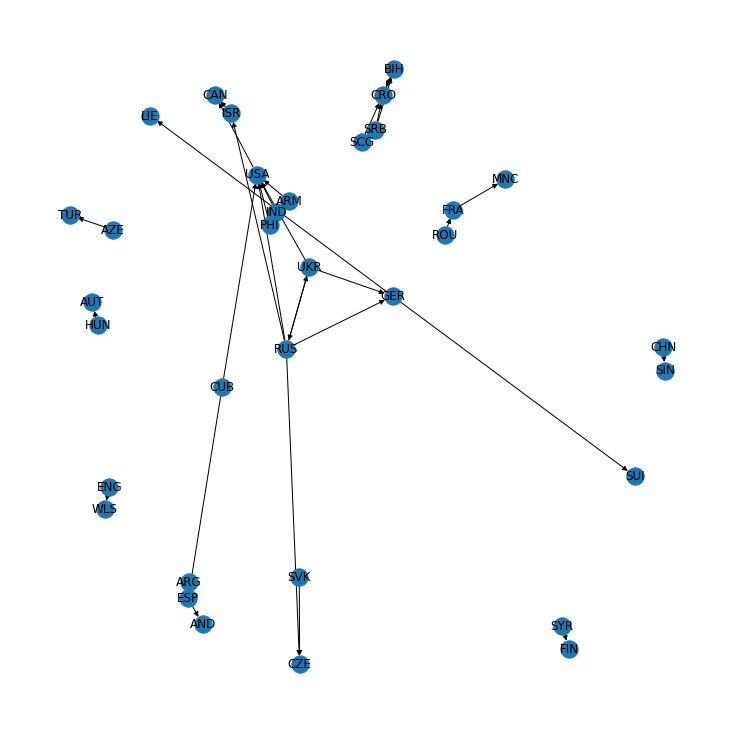

In [10]:
G = nx.DiGraph()
plt.figure(figsize=(10,10))
G.add_nodes_from(np.concatenate(list(new_dict.keys())))
G.add_edges_from(list(new_dict.keys()))
nx.draw(G,with_labels = True)

# Q2

## NBA Players

For this question we are going to use the following dataset:

In [3]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


The data contains play-by-play information about all games from the 2018-2019 NBA season. We are interested in the columns 'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME'. If the specific entry involves two or more players PLAYER2_ID, PLAYER2_NAME, PLAYER3_ID, PLAYER3_NAME are going to be non-empty. 

1. Construct a list of pairs that contains pairs of player names in interaction. If the play-by-play involves 3 players A,B and C you must have 3 entries: (A,B), (A,C) and (B,C) (write the pairs in the dictionary order).
2. Construct a python  dictionary where the keys are pairs of player names and the values are the number of times each pair appears in the list you constructed in step 1.
3. Filter the list and keep only the entries that appear more than 74 times (i.e. 75 or more).
4. Construct a `igraph` graph from the data you obtained from step 3.
5. Display the graph.
6. List the maximal cliques using the `maximal_cliques` of the graph data structure.

# Answer #2

## Libraries

We import the requisite libraries:

In [11]:
import pandas as pd
import numpy as np
import spacy
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from urllib.request import urlopen

## Web Scraping

We read the link containing the data with pandas ```pd.read_csv()``` function.

In [12]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


## Data Processing

We take 3 columns that we will use from our data.

In [13]:
df=NBA[['PLAYER1_NAME','PLAYER2_NAME','PLAYER3_NAME']]
df.tail()

,PLAYER1_NAME,PLAYER2_NAME,PLAYER3_NAME
582463,NaN,NaN,NaN
582464,Ante Zizic,Jordan Clarkson,NaN
582465,Nik Stauskas,NaN,NaN
582466,Maxi Kleber,NaN,NaN
582467,NaN,NaN,NaN


We delete rows containing 2 or 3 NaNs with ```dropna()```.

In [14]:
df=df.dropna(thresh=2)
df=df.reset_index(drop=True)
df

,PLAYER1_NAME,PLAYER2_NAME,PLAYER3_NAME
0,Deandre Ayton,Kenneth Faried,Elie Okobo
1,Josh Jackson,James Harden,NaN
2,Mikal Bridges,James Harden,NaN
3,James Harden,Devin Booker,NaN
4,Elie Okobo,James Ennis III,NaN
...,...,...,...
202110,Ante Zizic,David Nwaba,NaN
202111,Cedi Osman,Devin Harris,NaN
202112,David Nwaba,Ante Zizic,NaN
202113,Dirk Nowitzki,Dorian Finney-Smith,NaN


Thanks to the ```isnull().any()``` pattern, we see that there are no NaN values left in our first column.

In [15]:
df.isnull().any()

PLAYER1_NAME    False
PLAYER2_NAME     True
PLAYER3_NAME     True
dtype: bool

## 1)

Thanks to the for loop and if structures I have set up, we create a list of pairs containing interacting pairs of player names.
In addition, with the ```sorted()``` function, we assign these pairs by arranging them in alphabetical order.

In [16]:
A = df['PLAYER1_NAME']
B = df['PLAYER2_NAME']
C = df['PLAYER3_NAME']
new_list=[]
for i in range(len(df)):
    if df['PLAYER2_NAME'].isnull()[i] == True :
        new_list.append((sorted((A[i],C[i]))[0],sorted((A[i],C[i]))[1]))
    elif df['PLAYER3_NAME'].isnull()[i] == True :
        new_list.append((sorted((A[i],B[i]))[0],sorted((A[i],B[i]))[1]))
    else:
        new_list.append((sorted((A[i],B[i]))[0],sorted((A[i],B[i]))[1]))
        new_list.append((sorted((A[i],C[i]))[0],sorted((A[i],C[i]))[1]))
        new_list.append((sorted((B[i],C[i]))[0],sorted((B[i],C[i]))[1]))
new_list   

[('Deandre Ayton', 'Kenneth Faried'),
 ('Deandre Ayton', 'Elie Okobo'),
 ('Elie Okobo', 'Kenneth Faried'),
 ('James Harden', 'Josh Jackson'),
 ('James Harden', 'Mikal Bridges'),
 ('Devin Booker', 'James Harden'),
 ('Elie Okobo', 'James Ennis III'),
 ('Deandre Ayton', 'James Harden'),
 ('James Harden', 'Josh Jackson'),
 ('Deandre Ayton', 'Elie Okobo'),
 ('Chris Paul', 'Kenneth Faried'),
 ('Chris Paul', 'Elie Okobo'),
 ('Chris Paul', 'Elie Okobo'),
 ('Chris Paul', 'Elie Okobo'),
 ('Chris Paul', 'Elie Okobo'),
 ('Deandre Ayton', 'Elie Okobo'),
 ('Josh Jackson', 'Kenneth Faried'),
 ('Chris Paul', 'Josh Jackson'),
 ('James Ennis III', 'Josh Jackson'),
 ('Chris Paul', 'James Harden'),
 ('Elie Okobo', 'Kelly Oubre Jr.'),
 ('Austin Rivers', 'Kenneth Faried'),
 ('Chris Paul', 'Nene'),
 ('Austin Rivers', 'PJ Tucker'),
 ('Devin Booker', 'Nene'),
 ('Gerald Green', 'James Ennis III'),
 ('Josh Jackson', 'Kelly Oubre Jr.'),
 ('James Harden', 'Mikal Bridges'),
 ('Devin Booker', 'Mikal Bridges'),
 ('De

## 2)

We find the number of these (A,B) in our list with ```count()```.
We create a python dictionary where keys are pairs of player names and values are the number of times each pair appears in the list.

In [17]:
Y={}
for i in range(len(new_list)):
    Y[(new_list[i])]=new_list.count(new_list[i])
Y  

{('Deandre Ayton', 'Kenneth Faried'): 1,
 ('Deandre Ayton', 'Elie Okobo'): 32,
 ('Elie Okobo', 'Kenneth Faried'): 3,
 ('James Harden', 'Josh Jackson'): 8,
 ('James Harden', 'Mikal Bridges'): 11,
 ('Devin Booker', 'James Harden'): 4,
 ('Elie Okobo', 'James Ennis III'): 1,
 ('Deandre Ayton', 'James Harden'): 13,
 ('Chris Paul', 'Kenneth Faried'): 39,
 ('Chris Paul', 'Elie Okobo'): 4,
 ('Josh Jackson', 'Kenneth Faried'): 3,
 ('Chris Paul', 'Josh Jackson'): 3,
 ('James Ennis III', 'Josh Jackson'): 1,
 ('Chris Paul', 'James Harden'): 135,
 ('Elie Okobo', 'Kelly Oubre Jr.'): 15,
 ('Austin Rivers', 'Kenneth Faried'): 16,
 ('Chris Paul', 'Nene'): 16,
 ('Austin Rivers', 'PJ Tucker'): 53,
 ('Devin Booker', 'Nene'): 1,
 ('Gerald Green', 'James Ennis III'): 40,
 ('Josh Jackson', 'Kelly Oubre Jr.'): 56,
 ('Devin Booker', 'Mikal Bridges'): 111,
 ('Deandre Ayton', 'Nene'): 1,
 ('Gerald Green', 'James Harden'): 87,
 ('James Harden', 'Kelly Oubre Jr.'): 11,
 ('Devin Booker', 'Richaun Holmes'): 56,
 ('D

In this dictionary, we filter the values greater than 74 with ```filter()```.

In [18]:
new_dict=dict(filter(lambda elem: elem[1] >= 75, Y.items() ))
new_dict

{('Chris Paul', 'James Harden'): 135,
 ('Devin Booker', 'Mikal Bridges'): 111,
 ('Gerald Green', 'James Harden'): 87,
 ('Chris Paul', 'PJ Tucker'): 83,
 ('Chris Paul', 'Gerald Green'): 95,
 ('Devin Booker', 'Jamal Crawford'): 95,
 ('Jamal Crawford', 'Mikal Bridges'): 82,
 ('Deandre Ayton', 'Richaun Holmes'): 220,
 ('Deandre Ayton', 'Devin Booker'): 134,
 ('Josh Jackson', 'Mikal Bridges'): 110,
 ('Devin Booker', 'Josh Jackson'): 85,
 ('Devin Booker', 'Kelly Oubre Jr.'): 83,
 ('Deandre Ayton', 'Josh Jackson'): 86,
 ('James Harden', 'PJ Tucker'): 91,
 ('Donovan Mitchell', 'Joe Ingles'): 190,
 ('Joe Ingles', 'Kyle Korver'): 109,
 ('Derrick Favors', 'Jae Crowder'): 132,
 ('Derrick Favors', 'Rudy Gobert'): 252,
 ('Donovan Mitchell', 'Jae Crowder'): 91,
 ('Joe Ingles', "Royce O'Neale"): 199,
 ('Kyle Korver', "Royce O'Neale"): 92,
 ('Jae Crowder', 'Thabo Sefolosha'): 97,
 ('Donovan Mitchell', 'Rudy Gobert'): 123,
 ('Jae Crowder', 'Joe Ingles'): 135,
 ('Jae Crowder', "Royce O'Neale"): 81,
 ('De

## 4)

In order to visualize our latest dictionary with ig.graph, we add all basketball player names to the vertices section with ```add_vertices()``` by ```np.concatenate()```.
We put the ordered pairs in the dictionary into ```add_edges()``` to create the edges.

In [19]:
G = ig.Graph()
G.add_vertices(np.concatenate(list(new_dict.keys())))
G.add_edges(new_dict.keys())
G.vs['label'] = np.concatenate(list(new_dict.keys()))

## 5)

We draw with ```ig.plot()```.

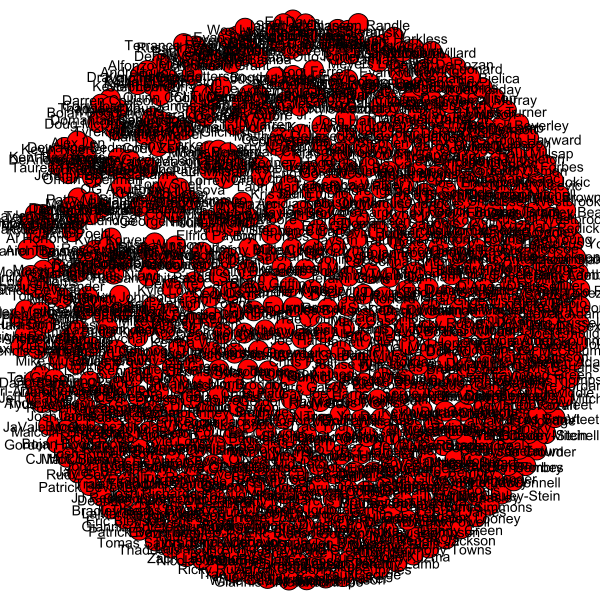

In [20]:
ig.plot(G)

## 6)

I have listed the max cliques using the ```maximal_cliques()``` value of the chart data structure.

In [21]:
G.maximal_cliques()

[(768,),
 (516,),
 (9,),
 (518,),
 (599,),
 (520,),
 (598,),
 (522,),
 (523,),
 (524,),
 (525,),
 (526,),
 (527,),
 (528,),
 (529,),
 (530,),
 (531,),
 (532,),
 (533,),
 (534,),
 (597,),
 (536,),
 (537,),
 (538,),
 (61,),
 (540,),
 (541,),
 (542,),
 (62,),
 (544,),
 (545,),
 (596,),
 (547,),
 (548,),
 (592,),
 (550,),
 (551,),
 (552,),
 (553,),
 (554,),
 (555,),
 (556,),
 (557,),
 (558,),
 (559,),
 (560,),
 (561,),
 (562,),
 (750,),
 (591,),
 (565,),
 (566,),
 (567,),
 (568,),
 (749,),
 (570,),
 (571,),
 (590,),
 (585,),
 (584,),
 (583,),
 (65,),
 (582,),
 (578,),
 (579,),
 (66,),
 (581,),
 (10,),
 (68,),
 (69,),
 (70,),
 (71,),
 (748,),
 (746,),
 (766,),
 (75,),
 (745,),
 (77,),
 (78,),
 (744,),
 (742,),
 (81,),
 (82,),
 (741,),
 (84,),
 (740,),
 (86,),
 (87,),
 (88,),
 (89,),
 (90,),
 (91,),
 (92,),
 (93,),
 (94,),
 (95,),
 (96,),
 (97,),
 (98,),
 (99,),
 (100,),
 (101,),
 (738,),
 (737,),
 (104,),
 (736,),
 (735,),
 (734,),
 (108,),
 (732,),
 (731,),
 (111,),
 (730,),
 (113,),
 (114

# Q3

## Charles Dickens' *Great Expectations*

For this question we are going to use the following dataset:

In [4]:
with urlopen('https://www.gutenberg.org/files/1400/1400-0.txt') as f:
    raw = f.read()

greatExpectations = raw[1900:1039269].decode('utf8')

These are the names of the major characters in the novel:

In [5]:
names = [
 'Joe',
 'Pip',
 'Wopsle',
 'Hubble',
 'Pumblechook',
 'Richard',
 'Wopsle',
 'Biddy',
 'Havisham',
 'Joseph',
 'Sarah',
 'Estella',
 'Orlick',
 'Mike',
 'Wemmick',
 'Herbert',
 'Pocket',
 'Jane',
 'Flopson',
 'Coiler',
 'Drummle',
 'Jack',
 'Spider',
 'Handel',
 'Herbert',
 'Clara',
 'Skiffins',
 'Magwitch',
 'Provis',
 'Compeyson',
 'Tom',
 'Bill',
 'Barley',
 'Orlick',
 'William']

names = set(sorted(names))
names

{'Barley',
 'Biddy',
 'Bill',
 'Clara',
 'Coiler',
 'Compeyson',
 'Drummle',
 'Estella',
 'Flopson',
 'Handel',
 'Havisham',
 'Herbert',
 'Hubble',
 'Jack',
 'Jane',
 'Joe',
 'Joseph',
 'Magwitch',
 'Mike',
 'Orlick',
 'Pip',
 'Pocket',
 'Provis',
 'Pumblechook',
 'Richard',
 'Sarah',
 'Skiffins',
 'Spider',
 'Tom',
 'Wemmick',
 'William',
 'Wopsle'}

1. Split the text into sentences using a sentence tokenizer from your favorite NLP library.
2. Construct a list of pairs of names: a pair of names (A,B) appears in the list if and only if both A and B appears in the same sentence. When you store the pair (A,B) in the list make sure A appears before B in the alphabetical order.
3. Construct a python dictionary where the keys are pairs of names and values are the number of times each pair appears in the list you constructed in step 2.
4. Filter the list and retain only those pairs that appear more than twice (i.e. 3 or more).
5. Construct a `networkx` graph using the pairs you have from step 4.
6. Display the graph.

# Answer #3

## Web Scraping

We read the link.

In [22]:
with urlopen('https://www.gutenberg.org/files/1400/1400-0.txt') as f:
    raw = f.read()

greatExpectations = raw[1900:1039269].decode('utf8')
greatExpectations

'\r\n\r\nMy father’s family name being Pirrip, and my Christian name Philip, my\r\ninfant tongue could make of both names nothing longer or more explicit\r\nthan Pip. So, I called myself Pip, and came to be called Pip.\r\n\r\nI give Pirrip as my father’s family name, on the authority of his\r\ntombstone and my sister,—Mrs. Joe Gargery, who married the blacksmith.\r\nAs I never saw my father or my mother, and never saw any likeness of\r\neither of them (for their days were long before the days of\r\nphotographs), my first fancies regarding what they were like were\r\nunreasonably derived from their tombstones. The shape of the letters on\r\nmy father’s, gave me an odd idea that he was a square, stout, dark man,\r\nwith curly black hair. From the character and turn of the inscription,\r\n“_Also Georgiana Wife of the Above_,” I drew a childish conclusion that\r\nmy mother was freckled and sickly. To five little stone lozenges, each\r\nabout a foot and a half long, which were arranged in a

In [25]:
names = [
 'Joe',
 'Pip',
 'Wopsle',
 'Hubble',
 'Pumblechook',
 'Richard',
 'Wopsle',
 'Biddy',
 'Havisham',
 'Joseph',
 'Sarah',
 'Estella',
 'Orlick',
 'Mike',
 'Wemmick',
 'Herbert',
 'Pocket',
 'Jane',
 'Flopson',
 'Coiler',
 'Drummle',
 'Jack',
 'Spider',
 'Handel',
 'Herbert',
 'Clara',
 'Skiffins',
 'Magwitch',
 'Provis',
 'Compeyson',
 'Tom',
 'Bill',
 'Barley',
 'Orlick',
 'William']

names = list(sorted(names))
names

['Barley',
 'Biddy',
 'Bill',
 'Clara',
 'Coiler',
 'Compeyson',
 'Drummle',
 'Estella',
 'Flopson',
 'Handel',
 'Havisham',
 'Herbert',
 'Herbert',
 'Hubble',
 'Jack',
 'Jane',
 'Joe',
 'Joseph',
 'Magwitch',
 'Mike',
 'Orlick',
 'Orlick',
 'Pip',
 'Pocket',
 'Provis',
 'Pumblechook',
 'Richard',
 'Sarah',
 'Skiffins',
 'Spider',
 'Tom',
 'Wemmick',
 'William',
 'Wopsle',
 'Wopsle']

## 1)

i used ```replace()``` to clean \r\n parts of text.

In [28]:
clean_text=greatExpectations.replace('\r\n', '')
clean_text

'My father’s family name being Pirrip, and my Christian name Philip, myinfant tongue could make of both names nothing longer or more explicitthan Pip. So, I called myself Pip, and came to be called Pip.I give Pirrip as my father’s family name, on the authority of histombstone and my sister,—Mrs. Joe Gargery, who married the blacksmith.As I never saw my father or my mother, and never saw any likeness ofeither of them (for their days were long before the days ofphotographs), my first fancies regarding what they were like wereunreasonably derived from their tombstones. The shape of the letters onmy father’s, gave me an odd idea that he was a square, stout, dark man,with curly black hair. From the character and turn of the inscription,“_Also Georgiana Wife of the Above_,” I drew a childish conclusion thatmy mother was freckled and sickly. To five little stone lozenges, eachabout a foot and a half long, which were arranged in a neat row besidetheir grave, and were sacred to the memory of fi

After installing ```en_core_web_sm```, I divide the text I cleaned into sentences.

In [29]:
nlp = spacy.load('en_core_web_sm')
document = nlp(clean_text)
sentences = list(document.sents)
sentences

[My father’s family name being Pirrip, and my Christian name Philip, myinfant tongue could make of both names nothing longer or more explicitthan Pip.,
 So, I called myself Pip, and came to be called Pip.,
 I give Pirrip as my father’s family name, on the authority of histombstone and my sister,—Mrs.,
 Joe Gargery, who married the blacksmith.,
 As I never saw my father or my mother, and never saw any likeness ofeither of them (for their days were long before the days ofphotographs), my first fancies regarding what they were like wereunreasonably derived from their tombstones.,
 The shape of the letters onmy father’s, gave me an odd idea that he was a square, stout, dark man,with curly black hair.,
 From the character and turn of the inscription,“_Also Georgiana Wife of the Above_,” I drew a childish conclusion thatmy mother was freckled and sickly.,
 To five little stone lozenges, eachabout a foot and a half long, which were arranged in a neat row besidetheir grave, and were sacred to 

## 2)

I set up a loop that matches all the names together.
As a result, I hope that I will more easily get all the name pairs in the text.

In [26]:
D=[]
for i in range(len(names)):
    for j in range(len(names)):
        if i != j:
            D.append((names[i],names[j]))
D

[('Barley', 'Biddy'),
 ('Barley', 'Bill'),
 ('Barley', 'Clara'),
 ('Barley', 'Coiler'),
 ('Barley', 'Compeyson'),
 ('Barley', 'Drummle'),
 ('Barley', 'Estella'),
 ('Barley', 'Flopson'),
 ('Barley', 'Handel'),
 ('Barley', 'Havisham'),
 ('Barley', 'Herbert'),
 ('Barley', 'Herbert'),
 ('Barley', 'Hubble'),
 ('Barley', 'Jack'),
 ('Barley', 'Jane'),
 ('Barley', 'Joe'),
 ('Barley', 'Joseph'),
 ('Barley', 'Magwitch'),
 ('Barley', 'Mike'),
 ('Barley', 'Orlick'),
 ('Barley', 'Orlick'),
 ('Barley', 'Pip'),
 ('Barley', 'Pocket'),
 ('Barley', 'Provis'),
 ('Barley', 'Pumblechook'),
 ('Barley', 'Richard'),
 ('Barley', 'Sarah'),
 ('Barley', 'Skiffins'),
 ('Barley', 'Spider'),
 ('Barley', 'Tom'),
 ('Barley', 'Wemmick'),
 ('Barley', 'William'),
 ('Barley', 'Wopsle'),
 ('Barley', 'Wopsle'),
 ('Biddy', 'Barley'),
 ('Biddy', 'Bill'),
 ('Biddy', 'Clara'),
 ('Biddy', 'Coiler'),
 ('Biddy', 'Compeyson'),
 ('Biddy', 'Drummle'),
 ('Biddy', 'Estella'),
 ('Biddy', 'Flopson'),
 ('Biddy', 'Handel'),
 ('Biddy', 'Hav

I transform the list I created into a Dataframe with ```pd.DataFrame()```.

In [27]:
df=pd.DataFrame(D,columns=['Name1','Name2'])
df

,Name1,Name2
0,Barley,Biddy
1,Barley,Bill
2,Barley,Clara
3,Barley,Coiler
4,Barley,Compeyson
...,...,...
1185,Wopsle,Spider
1186,Wopsle,Tom
1187,Wopsle,Wemmick
1188,Wopsle,William


I tried many different loops, but I could not correctly construct the loop that obtains the noun pairs in sentences.

In [30]:
newlist=[]
for i in sentences:
    for x in list(df['Name1']):
        for y in list(df['Name2']):
            if x in sent and y in sentences[i]:
                newlist.append(str(x))

NameError: name 'sent' is not defined

In [31]:
newlist=[]
for x in names:
    for y in names:
        for i in range(len(sentences)):
            if x in sentences[i] and y in sentences[i] and x != y:
                newlist.append(str(x))

TypeError: Argument 'other' has incorrect type (expected spacy.tokens.token.Token, got str)